#**Lab 9 by Sughandhan S, 111901049**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
import copy
import heapq
import math

#Q1) GRID WORLD

In [ ]:
def Grid(n):
  priority_queue = []
  grid = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      grid[i][j] = 6
  block_loc = []
  print("Number of block states")
  bn = int(input())
  for i in range(bn):
    print("Enter location for block state (x,y)")
    x = int(input())
    y = int(input())
    block_loc.append([x,y])
    grid[x][y] = -1
  print("Starting coordinate (x,y)")
  x_start = int(input( )) 
  y_start =  int(input( )) 
  start = [x_start, y_start]
  grid[x_start][y_start] = 0
  print("Number of goal states")
  gn = int(input())
  #goal tracker
  gt = 1
  goals=[]
  for i in range(gn):
    print("Enter location for goal state (x,y)")
    gx = int(input())
    gy = int(input())
    goals.append([gx, gy])
    grid[gx][gy] = 1
  
  #predecessor matrix
  pred_mat = np.zeros([n,n])
  pred_mat[x_start][y_start] = -1

  heapq.heappush( priority_queue, [0, 0,start])
  explored_list=[]
  cur=[]
  print(grid)
  distance = 0
  #plotting grid
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  while len(priority_queue)>0 and gt<=1: #gn
    
    #algo starts here
    node = heapq.heappop(priority_queue)
    distance = node[1]
    distance += 1
    cur = node[2]
    explored_list.append(cur)
    if grid[cur[0]][cur[1]] ==1:
      grid[cur[0]][cur[1]] = 2
      x_new = cur[0]
      y_new = cur[1]
      print("YAAAY GOAL REACHED!")
      gt += 1
    else:
      grid[cur[0]][cur[1]] = 2

    print(grid)
    #plotting grid
    cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    plt.matshow(grid, cmap = cmap, norm = norm)
    plt.show()

    #moving right
    if cur[0]<n and cur[1]+1<n and cur[0]>=0 and cur[1]+1>=0:
      x_new = cur[0]
      y_new = cur[1]+1
      
      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])

      #if point is unexpolored
      elif grid[x_new][y_new]==6 : 
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
    
    #moving up
    if cur[0]-1<n and cur[1]<n and cur[0]-1>=0 and cur[1]>=0:
      x_new = cur[0]-1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        grid[x_new][y_new] = 1
        heapq.heappush(priority_queue, [ distance+ abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving left
    if cur[0]<n and cur[1]-1<n and cur[0]>=0 and cur[1]-1>=0:
      x_new = cur[0]
      y_new = cur[1]-1

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])

      
      #if point is unexpolored
      elif grid[x_new][y_new]==6:
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]

    #moving down
    if cur[0]+1<n and cur[1]<n and cur[0]+1>=0 and cur[1]>=0:
      x_new = cur[0]+1
      y_new = cur[1]

      #if point is the goal state
      if grid[x_new][y_new] == 1:
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy),distance, [x_new, y_new]])

      #if point is unexpolored
      elif grid[x_new][y_new]==6: 
        heapq.heappush(priority_queue, [ distance + abs(x_new-gx)+abs(y_new - gy), distance, [x_new, y_new]])
        grid[x_new][y_new] = 3
        #updating predecessor
        pred_mat[x_new][y_new] = n*cur[0]+cur[1]
  
  print(grid)
  cmap = colors.ListedColormap(['black', 'red', 'green', 'yellow', 'blue', 'purple'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 7.0]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.matshow(grid, cmap = cmap, norm = norm)
  plt.show()
  
  for i in goals:
    x_temp = int(i[0])
    y_temp = int(i[1]) 
  
    for i in range(n):
      for j in range(n):
        pred_mat[i][j] = int(pred_mat[i][j])
    print("Path to goal from source")
    while pred_mat[x_temp][y_temp]!=-1:
      print(x_temp,",", y_temp,"<=")
      tempo = int(pred_mat[x_temp][y_temp])
      x_temp = int(tempo/n)
      y_temp = int(tempo%n)
    print(x_temp,",", y_temp)
    print(" ")
    action = { "right" , "up", "down", "left" }
  return grid


In [ ]:
n = int(input())

5


Number of block states
4
Enter location for block state (x,y)
0
2
Enter location for block state (x,y)
1
2
Enter location for block state (x,y)
3
2
Enter location for block state (x,y)
4
2
Starting coordinate (x,y)
0
0
Number of goal states
1
Enter location for goal state (x,y)
4
4
[[ 0.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]
[[ 2.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


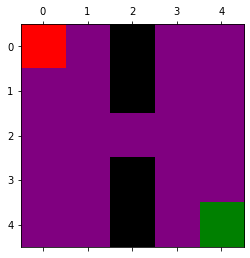

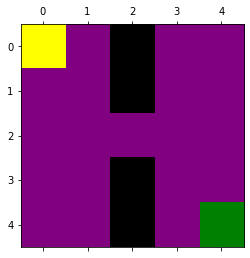

[[ 2.  2. -1.  6.  6.]
 [ 3.  6. -1.  6.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


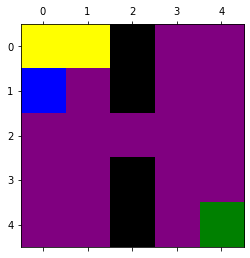

[[ 2.  2. -1.  6.  6.]
 [ 2.  3. -1.  6.  6.]
 [ 6.  6.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


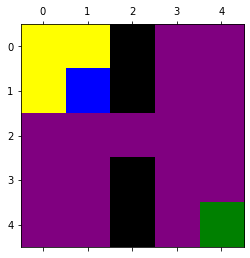

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 3.  6.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


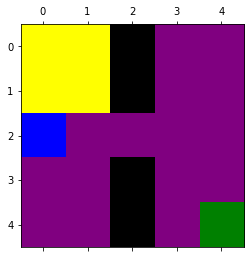

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  3.  6.  6.  6.]
 [ 6.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


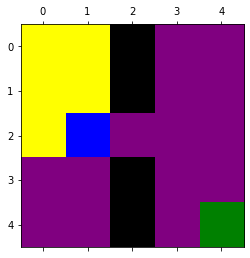

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  6.  6.  6.]
 [ 3.  6. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


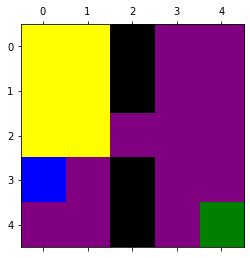

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  3.  6.  6.]
 [ 2.  3. -1.  6.  6.]
 [ 6.  6. -1.  6.  1.]]


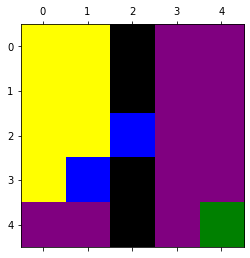

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  2.  6.  6.]
 [ 2.  3. -1.  6.  6.]
 [ 3.  6. -1.  6.  1.]]


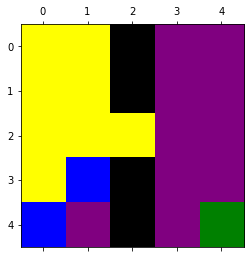

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 3.  6. -1.  6.  1.]]


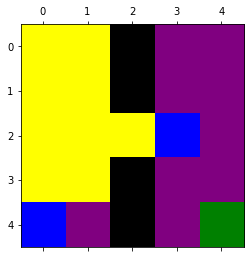

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  2.  3.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  3. -1.  6.  1.]]


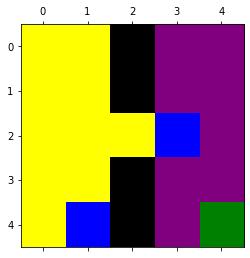

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  2.  2.  2.  6.]
 [ 2.  2. -1.  6.  6.]
 [ 2.  3. -1.  6.  1.]]


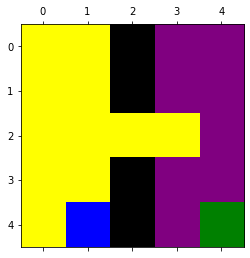

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  6.]
 [ 2.  2.  2.  2.  3.]
 [ 2.  2. -1.  3.  6.]
 [ 2.  2. -1.  6.  1.]]


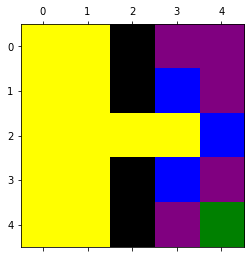

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  6.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  3.  6.]
 [ 2.  2. -1.  6.  1.]]


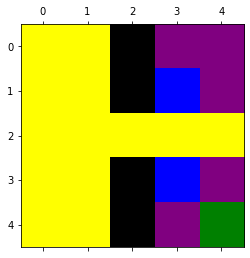

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  2.  3.]
 [ 2.  2. -1.  6.  1.]]


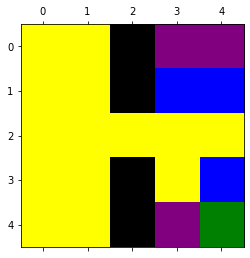

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  2.  2.]
 [ 2.  2. -1.  3.  1.]]


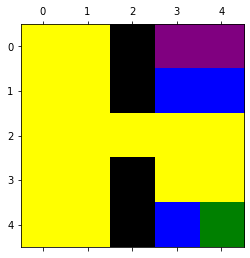

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  2.  2.]
 [ 2.  2. -1.  2.  1.]]


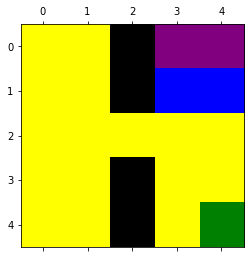

YAAAY GOAL REACHED!
[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  2.  2.]
 [ 2.  2. -1.  2.  2.]]


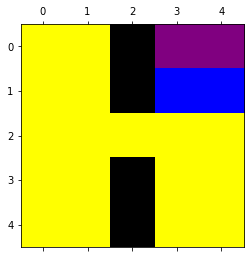

[[ 2.  2. -1.  6.  6.]
 [ 2.  2. -1.  3.  3.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2. -1.  2.  2.]
 [ 2.  2. -1.  2.  2.]]


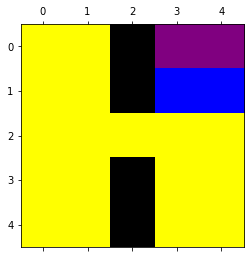

Path to goal from source
4 , 4 <=
4 , 3 <=
3 , 3 <=
2 , 3 <=
2 , 2 <=
2 , 1 <=
1 , 1 <=
0 , 1 <=
0 , 0
 


In [ ]:
finale = Grid(n)

#Q2) Puzzle

In [ ]:
# 0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,0,0],[7,6,5]])
initial_state = np.array([[1,2,3],[4,5,6],[0,7,0]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
starti = [[1,2,3],[4,0,0],[7,5,6]]
endi = [[1,2,3],[4,5,6],[7,0,0]]
inti = [[1,2,3],[7,5,0],[4,0,6]]

In [ ]:
#final_state not required
def manhattan_dis(cur, final):
  c=0
  for i in range(3):
    for j in range(3):
      # print(final[i][j])
      # print(cur[i][j])
      target = cur[i][j]
      if target ==0:
        continue
      target -=1
      x_goal = int(target/3)
      y_goal = int(target%3)
      c += abs(i - x_goal) + abs(j - y_goal)
  return c

In [ ]:
manhattan_dis(starti, endi)

2

In [ ]:
def manhattan_dis(cur, ini, emp):
  c=0
  s1=0
  s2=0
  t1=0
  t2=0
  id=-1
  for i in range(3):
    for j in range(3):
      num = cur[i][j]
      if num == 0:
        id+=1
        if id==0:
          s1= abs(i-emp[0][0])+ abs(j-emp[0][1])
          s2= abs(i-emp[1][0])+ abs(j-emp[1][1])
        else:
          t1= abs(i-emp[0][0])+ abs(j-emp[0][1])
          t2= abs(i-emp[1][0])+ abs(j-emp[1][1])
        continue
      flag=0
      for k in range(3):
        for l in range(3):
          if ini[k][l]==num:
            flag=1
            break
        if flag==1:
          break
      c += abs(i - k) + abs(j - l)
  first = [s1,s2]
  second = [t1,t2]
  c+= max(first)
  c+= max(second)
  return c

In [ ]:
def g_of_n(cur, ini):
  c=0
  for i in range(3):
    for j in range(3):
      num = cur[i][j]
      if num == 0:
        continue
      flag=0
      for k in range(3):
        for l in range(3):
          if ini[k][l]==num:
            flag=1
            break
        if flag==1:
          break
      c += abs(i - k) + abs(j - l)
  return c

In [ ]:
g_of_n(inti, starti)

3

In [ ]:
ww=7
qq= ww
qq+=2
print("ww",ww)
print("qq", qq)

ww 7
qq 9


In [ ]:
ddf = [[1,2],[3,4]]
fff = ddf.copy()
fff.append([5,6])
print("ddf", ddf)
print("fff", fff)

ddf [[1, 2], [3, 4]]
fff [[1, 2], [3, 4], [5, 6]]


structure of each node = [cost, move, [9 positions], current value, pred value]

In [ ]:
puzzle = np.zeros([3,3])
state =[]
for i in range(3):
  for j in range(3):
    #state.append(initial_state[i][j])
    puzzle[i][j] = initial_state[i][j]
state.append([puzzle, 0, -1])
print(state)
for i in state:
  print(i[0])
  print(i[1])
  print(i[2])

[[array([[1., 2., 3.],
       [4., 5., 6.],
       [0., 7., 0.]]), 0, -1]]
[[1. 2. 3.]
 [4. 5. 6.]
 [0. 7. 0.]]
0
-1


In [ ]:
ss=[]
heapq.heappush(ss,[4,3])
heapq.heappush(ss,[1,4])
heapq.heappush(ss,[1,2])
heapq.heappush(ss,[7,2])
heapq.heappush(ss,[10,])
heapq.heappush(ss,[0])
heapq.heappush(ss,[6])
heapq.heappush(ss,[5])

In [ ]:
ss

[[0], [4, 3], [1, 2], [5], [10], [1, 4], [6], [7, 2]]

In [ ]:
ss=[]
ss.append([4,3])
ss.append([1,4])
ss.append([1,2])
ss.append([7,2])
ss.append([11,3])
ss.append([11,0])
ss.append([6,5])
ss.append([5,9])

In [ ]:
print(ss)
ss.sort()
print(ss)
ss.sort(key=lambda x:x[1])
print(ss)

[[4, 3], [1, 4], [1, 2], [7, 2], [11, 3], [11, 0], [6, 5], [5, 9]]
[[1, 2], [1, 4], [4, 3], [5, 9], [6, 5], [7, 2], [11, 0], [11, 3]]
[[11, 0], [1, 2], [7, 2], [4, 3], [11, 3], [1, 4], [6, 5], [5, 9]]


In [ ]:
heapq.heappop(ss)

[11, 0]

In [ ]:
ss

[[1, 2], [4, 3], [7, 2], [5, 9], [11, 3], [1, 4], [6, 5]]

In [ ]:
dd = ss[2]
dd+=2
print(dd)
print(ss[2])

TypeError: ignored

structure of each node = [cost, number being shifted, [9 positions], current value, pred value]

In [ ]:
def puzzle_sol(initial, final_state):
  ## inputs are 2d lists
  goal_state = []
  for w in range(3):
    for e in range(3):
      goal_state.append(final_state[w][e])
  print("This is the INITIAL STATE")
  print(" ")
  print(np.array(initial))
  print(" ")
  print(" LETS BEGIN SOLVING THE PUZZLE")
  print(" ")
  ini_list = []
  
  for w in range(3):
    for e in range(3):
      ini_list.append(initial[w][e])

  frontier = []
  counter = 0
  #heapq.heappush(frontier, [0, "nothing", ini_list,counter, -1 ] )
  heapq.heappush(frontier, [0, ini_list,counter, -1 ] )
  reached = 0
  explored_list=[]
  dist =0
  while len(frontier)>0 :

          ## We will dist to keep track of predecessors
    #dist+=1
    current_node = heapq.heappop(frontier)
    # [current_state, counter val, pred val]
    current_node= current_node[1:]
    # current state
    cur_puzzle = current_node[0]
    #counter val
    #cur_counter = dist
    #counter val
    prev_counter = current_node[1]
    #appending NODE to explored lists
    explored_list.append(current_node)
    puzzle = np.zeros([3,3])
    #list for storing empty spaces

    if cur_puzzle == goal_state:
      reached = 1
      continue

    emp = []
    for i in range(3):
      for j in range(3):
        l= 3*i+j
        puzzle[i][j] = cur_puzzle[l]
        if puzzle[i][j]==0:
          emp.append([i,j])
    print(emp)
    for p in emp:

      temp1 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp1[i][j] = puzzle[i][j]     
    
      x = p[0]
      y = p[1]  
      
      #up
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x-1
      new_y = y
      if new_x>=0 and temp1[new_x][new_y]!=0:
        num = temp1[new_x][new_y]
        inter = temp1[x][y]
        temp1[x][y] = temp1[new_x][new_y] 
        temp1[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp1[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp1, final_state, emp)
          gofn = g_of_n(temp1, initial)
          #heapq.heappush(frontier, [man_cost+ gofn, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "up", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [man_cost+ gofn, check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          print(temp1)
          print("num",num)
          print("Heuristic Cost",man_cost)
          print("Total Cost",man_cost+gofn)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 1,")
        #print( temp1 )
        #print(puzzle)
      
      temp2 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp2[i][j] = puzzle[i][j]     
      
      x = p[0]
      y = p[1]
      #down
                #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x+1
      new_y = y
      if new_x<3 and temp2[new_x][new_y]!=0:
        num = temp2[new_x][new_y]
        inter = temp2[x][y]
        temp2[x][y] = temp2[new_x][new_y] 
        temp2[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp2[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp2, final_state, emp)
          gofn = g_of_n(temp2, initial)
          #heapq.heappush(frontier, [man_cost+ gofn, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "down", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [man_cost+ gofn, check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          print(temp2)
          print("num",num)
          print("Heuristic Cost",man_cost)
          print("Total Cost",man_cost+gofn)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 2,")
        #print( temp2 )
        #print(puzzle)


      temp3 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp3[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #left
              #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y-1
      if new_y>=0 and temp3[new_x][new_y]!=0:
        num = temp3[new_x][new_y]
        inter = temp3[x][y]
        temp3[x][y] = temp3[new_x][new_y] 
        temp3[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp3[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp3, final_state, emp)
          gofn = g_of_n(temp3, initial)
          #heapq.heappush(frontier, [man_cost+ gofn, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "left", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [man_cost+ gofn, check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          print(temp3)
          print("num",num)
          print("Heuristic Cost",man_cost)
          print("Total Cost",man_cost+gofn)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
        #print("check 3,")
        #print( temp3 )
        #print(puzzle)
      
      temp4 = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          temp4[i][j] = puzzle[i][j]     

      x = p[0]
      y = p[1]
      #right
                    #dist+=1
      #cur_counter+= 1
      dist+=1
      new_x = x
      new_y = y+1
      if new_y<3 and temp4[new_x][new_y]!=0:
        num = temp4[new_x][new_y]
        inter = temp4[x][y]
        temp4[x][y] = temp4[new_x][new_y] 
        temp4[new_x][new_y] = inter
        check_state =[]
        for i in range(3):
          for j in range(3):
            check_state.append(temp4[i][j])
        flag=0
        #BAsically checking if check_state is already present or not
        for i in explored_list:
          if i[0] == check_state:
            flag = 1
            break
        if flag==0:
          man_cost = manhattan_dis(temp4, final_state, emp)
          gofn = g_of_n(temp4, initial)
          #heapq.heappush(frontier, [man_cost+ gofn, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, "right", check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost+ gofn, num, check_state, cur_counter, prev_counter])
          #heapq.heappush(frontier, [man_cost, check_state, cur_counter, prev_counter])
          heapq.heappush(frontier, [man_cost+ gofn, check_state, dist, prev_counter])
          #heapq.heappush(frontier, [man_cost+ dist, check_state, cur_counter, prev_counter])
          print(temp4)
          print("num",num)
          print("Heuristic Cost",man_cost)
          print("Total Cost",man_cost+gofn)
          if check_state == goal_state:
            explored_list.append([check_state, dist, prev_counter])
            reached=1
            print("REACHED")
            break
    
    #goal state has been reached
    if reached==1:
      break;
    
        #print("check 4,")
        #print( temp4 )
        #print(puzzle)
      #count += 1
      n-=1

  print(len(frontier))
  print(len(explored_list))

  goal_node = explored_list[-1]
  pointer = goal_node[2]
  print("Steps to the solution")
  config = goal_node[0]
  puz = np.zeros([3,3])
  for r in range(3):
    for m in range(3):
      k= 3*r+m
      puz[r][m] =config[k] 
  #print(puz)
  path=[]
  path.append(puz)
  while pointer!=-1:
    for node in explored_list:
      if node[1]==pointer:
        pointer = node[2]
        tempo = node[0]
        puz = np.zeros([3,3])
        for r in range(3):
          for m in range(3):
            k= 3*r+m
            puz[r][m] = tempo[k]
        #print(puz)
        path.append(puz)
  path.reverse()
  h = len(path)
  step_size=0
  for g in path:
    if step_size==0:
      print("Starting State")
    else:
      print("Step", step_size)
    print(g)
    step_size += 1
    print(" ")
  print("Total steps taken", h-1)

In [ ]:
initial_state = np.array([[1,2,3],[4,6,5],[0,7,0]])  
fxx = [1,2,3,4,5,6,0,7,0]
if initial_state == fxx:
  print("LOL")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#0 -> indicates empty slots
#initial_state = np.array([[1,2,3],[4,5,6],[0,7,0]])   
#initial_state = np.array([[1,0,3],[4,2,6],[7,5,0]])
#initial_state = np.array([[1,0,3],[4,2,5],[7,6,0]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
#initial_state = np.array([[3,2,1],[6,5,4],[0,0,7]])
initial_state = np.array([[2,6,0],[4,3,7],[5,0,1]])
final_state = np.array([[1,2,3],[4,5,6],[7,0,0]])

In [ ]:
puzzle_sol(initial_state, final_state)

Streaming output truncated to the last 5000 lines.
Total Cost 18
[[0, 0], [2, 1]]
[[4. 2. 6.]
 [0. 1. 3.]
 [7. 0. 5.]]
num 4.0
Heuristic Cost 7
Total Cost 18
[[2. 0. 6.]
 [4. 1. 3.]
 [7. 0. 5.]]
num 2.0
Heuristic Cost 7
Total Cost 16
[[0. 2. 6.]
 [4. 0. 3.]
 [7. 1. 5.]]
num 1.0
Heuristic Cost 7
Total Cost 16
[[0. 2. 6.]
 [4. 1. 3.]
 [0. 7. 5.]]
num 7.0
Heuristic Cost 7
Total Cost 16
[[0, 0], [1, 1]]
[[4. 2. 6.]
 [0. 0. 3.]
 [7. 1. 5.]]
num 4.0
Heuristic Cost 8
Total Cost 18
[[2. 0. 6.]
 [4. 0. 3.]
 [7. 1. 5.]]
num 2.0
Heuristic Cost 8
Total Cost 16
[[0. 0. 6.]
 [4. 2. 3.]
 [7. 1. 5.]]
num 2.0
Heuristic Cost 8
Total Cost 18
[[0. 2. 6.]
 [0. 4. 3.]
 [7. 1. 5.]]
num 4.0
Heuristic Cost 8
Total Cost 18
[[0. 2. 6.]
 [4. 3. 0.]
 [7. 1. 5.]]
num 3.0
Heuristic Cost 8
Total Cost 16
[[0, 0], [2, 0]]
[[4. 2. 6.]
 [0. 1. 3.]
 [0. 7. 5.]]
num 4.0
Heuristic Cost 8
Total Cost 18
[[2. 0. 6.]
 [4. 1. 3.]
 [0. 7. 5.]]
num 2.0
Heuristic Cost 8
Total Cost 16
[[0. 2. 6.]
 [0. 1. 3.]
 [4. 7. 5.]]
num 4.0
Heu